# Demonstration of McStasScript
This file demonstrates how McStasScript can be used to run McStas from a python environment in a userfreindly manner.

In [1]:
import sys
sys.path.append('/Users/madsbertelsen/PaNOSC/McStasScript/github/McStasScript') # Path to McStasScript pythoon file

from mcstasscript.interface import instr, plotter, functions

# Creating the instance of the class, insert path to mcrun and to mcstas root directory
Instr = instr.McStas_instr("jupyter_demo",
                           mcrun_path = "/Applications/McStas-2.5.app/Contents/Resources/mcstas/2.5/bin",
                           mcstas_path = "/Applications/McStas-2.5.app/Contents/Resources/mcstas/2.5")

In [3]:
Instr.show_components() # Shows available McStas component categories in current installation

Here are the available component categories:
 sources
 optics
 samples
 monitors
 misc
 contrib
 union
 obsolete
Call show_components(category_name) to display


In [4]:
Instr.show_components("sources") # Display all McStas source components 

Here are all components in the sources category.
 Adapt_check     Monitor_Optimizer   Source_div      Virtual_output
 ESS_butterfly   Source_Maxwell_3    Source_gen      
 ESS_moderator   Source_Optimizer    Source_simple   
 Moderator       Source_adapt        Virtual_input   


In [5]:
Instr.component_help("Source_simple") # Displays help on the Source_simple component

 ___ Help Source_simple _________________________________________________
|optional parameter|required parameter|default value|user specified value|
radius = 0.1 [m] // Radius of circle in (x,y,0) plane where neutrons are generated.
yheight = 0.0 [m] // Height of rectangle in (x,y,0) plane where neutrons are generated.
xwidth = 0.0 [m] // Width of rectangle in (x,y,0) plane where neutrons are generated.
dist = 0.0 [m] // Distance to target along z axis.
focus_xw = 0.045 [m] // Width of target
focus_yh = 0.12 [m] // Height of target
E0 = 0.0 [meV] // Mean energy of neutrons.
dE = 0.0 [meV] // Energy half spread of neutrons (flat or gaussian sigma).
lambda0 = 0.0 [AA] // Mean wavelength of neutrons.
dlambda = 0.0 [AA] // Wavelength half spread of neutrons.
flux = 1.0 [1/(s*cm**2*st*energy unit)] // flux per energy unit, Angs or meV if flux=0, the source emits 1 in 4*PI whole space.
gauss = 0.0 [1] // Gaussian (1) or Flat (0) energy/wavelength distribution
target_index = 1 [1] // relative

In [6]:
source = Instr.add_component("Source","Source_simple") # Adds an instance of Source_simple

In [7]:
# Lets add a parameter to the instrument to control the wavelength of the source
Instr.add_parameter("double", "wavelength", value=3, comment="Wavelength emmited from source")
source.xwidth = 0.06; source.yheight = 0.08;
source.dist = 2; source.focus_xw = 0.05; source.focus_yh = 0.05
source.lambda0 = "wavelength"; source.dlambda = 0.1

In [8]:
source.print_long() # Verify that the information is correct

COMPONENT Source = Source_simple
  yheight = 0.08 [m]
  xwidth = 0.06 [m]
  dist = 2 [m]
  focus_xw = 0.05 [m]
  focus_yh = 0.05 [m]
  lambda0 = wavelength [AA]
  dlambda = 0.1 [AA]
AT [0, 0, 0] ABSOLUTE
ROTATED [0, 0, 0] ABSOLUTE


In [9]:
guide = Instr.add_component("Guide", "Guide_gravity", AT=[0,0,2], RELATIVE="Source")
guide.set_comment="Beam extraction and first guide piece"

In [10]:
guide.show_parameters() # Lets view the parameters available in our guide component

 ___ Help Guide_gravity _________________________________________________
|optional parameter|required parameter|default value|user specified value|
w1 [m] // Width at the guide entry
h1 [m] // Height at the guide entry
w2 = 0.0 [m] // Width at the guide exit. If 0, use w1.
h2 = 0.0 [m] // Height at the guide exit. If 0, use h1.
l [m] // length of guide
R0 = 0.995 [1] // Low-angle reflectivity
Qc = 0.0218 [AA-1] // Critical scattering vector
alpha = 4.38 [AA] // Slope of reflectivity
m = 1.0 [1] // m-value of material. Zero means completely absorbing. m=0.65  glass/SiO2 Si   Ni  Ni58  supermirror Be    Diamond m=  0.65       0.47 1   1.18  2-6         1.01  1.12 for glass/SiO2, m=1 for Ni, 1.2 for Ni58, m=2-6 for supermirror. m=0.47 for Si
W = 0.003 [AA-1] // Width of supermirror cut-off
nslit = 1.0 [1] // Number of vertical channels in the guide (>= 1) (nslit-1 vertical dividing walls).
d = 0.0005 [m] // Thickness of subdividing walls
mleft = -1.0 [1] // m-value of material for left. 

In [11]:
guide.set_parameters({"w1" : 0.05, "w2" : 0.05, "h1" : 0.05, "h2" : 0.05, "l" : 8, "m" : 3.5, "G" : -9.2})

In [12]:
guide.print_long() # Verify the information on this component is correct

COMPONENT Guide = Guide_gravity
  w1 = 0.05 [m]
  h1 = 0.05 [m]
  w2 = 0.05 [m]
  h2 = 0.05 [m]
  l = 8 [m]
  m = 3.5 [1]
  G = -9.2 [m/s2]
AT [0, 0, 2] RELATIVE Source
ROTATED [0, 0, 0] RELATIVE Source


In [13]:
sample = Instr.add_component("sample", "PowderN", AT=[0, 0, 9], RELATIVE="Guide") # Add a sample

In [14]:
sample.radius = 0.015; sample.yheight = 0.05; sample.reflections = "\"Cu.laz\"" # Copper cylinder

In [15]:
Instr.show_components("monitors") # Monitors are needed to record information

Here are all components in the monitors category.
 Brilliance_monitor      Monitor           PSD_monitor_psf_eff   TOF2E_monitor
 DivLambda_monitor       Monitor_4PI       PSDcyl_monitor        TOF2Q_cylPSD_monitor
 DivPos_monitor          Monitor_Sqw       PSDlin_diff_monitor   TOFLambda_monitor
 Divergence_monitor      Monitor_nD        PSDlin_monitor        TOF_PSD_monitor_rad
 EPSD_monitor            PSD_TOF_monitor   PolLambda_monitor     TOF_cylPSD_monitor
 E_monitor               PSD_monitor       Pol_monitor           TOF_monitor
 Hdiv_monitor            PSD_monitor_4PI   PreMonitor_nD         TOFlog_monitor
 L_monitor               PSD_monitor_TOF   Res_monitor           
 MeanPolLambda_monitor   PSD_monitor_psf   Sqq_w_monitor         


In [16]:
sphere = Instr.add_component("PSD_4PI", "PSD_monitor_4PI", RELATIVE="sample") # Add 4PI detector

In [17]:
sphere.nx = 300; sphere.ny = 300
sphere.radius = 1; sphere.restore_neutron = 1
sphere.filename = "\"PSD_4PI.dat\"" # filenames need printed quotes, use \"
sphere.print_long() # Verify that monitors have filenames that are strings when printed

COMPONENT PSD_4PI = PSD_monitor_4PI
  nx = 300 [1]
  ny = 300 [1]
  filename = "PSD_4PI.dat" [string]
  radius = 1 [m]
  restore_neutron = 1 [1]
AT [0, 0, 0] RELATIVE sample
ROTATED [0, 0, 0] RELATIVE sample


In [18]:
PSD = Instr.add_component("PSD", "PSD_monitor", AT=[0,0,1], RELATIVE="sample") # Add PSD monitor
PSD.xwidth = 0.1; PSD.yheight = 0.1; PSD.nx = 200; PSD.ny = 200
PSD.filename = "\"PSD.dat\""; PSD.restore_neutron = 1

In [19]:
L_mon = Instr.add_component("L_mon", "L_monitor", RELATIVE="PSD")

In [20]:
L_mon.Lmin = "wavelength - 0.3"; L_mon.Lmax = "wavelength + 0.3"; L_mon.nL = 150
L_mon.xwidth = 0.1; L_mon.yheight = 0.1
L_mon.filename = "\"L_mon.dat\""; L_mon.restore_neutron = 1
L_mon.comment = "Wavelength monitor for narrow range"

In [21]:
L_mon.print_long()

// Wavelength monitor for narrow range
COMPONENT L_mon = L_monitor
  nL = 150 [1]
  filename = "L_mon.dat" [string]
  xwidth = 0.1 [m]
  yheight = 0.1 [m]
  Lmin = wavelength - 0.3 [AA]
  Lmax = wavelength + 0.3 [AA]
  restore_neutron = 1 [1]
AT [0, 0, 0] RELATIVE PSD
ROTATED [0, 0, 0] RELATIVE PSD


In [22]:
Instr.print_components() # Lets get an overview of the instrument so far

Source    Source_simple     AT  [0, 0, 0]     ABSOLUTE          ROTATED  [0, 0, 0]     ABSOLUTE
Guide     Guide_gravity     AT  [0, 0, 2]     RELATIVE Source   ROTATED  [0, 0, 0]     RELATIVE Source
sample    PowderN           AT  [0, 0, 9]     RELATIVE Guide    ROTATED  [0, 0, 0]     RELATIVE Guide
PSD_4PI   PSD_monitor_4PI   AT  [0, 0, 0]     RELATIVE sample   ROTATED  [0, 0, 0]     RELATIVE sample
PSD       PSD_monitor       AT  [0, 0, 1]     RELATIVE sample   ROTATED  [0, 0, 0]     RELATIVE sample
L_mon     L_monitor         AT  [0, 0, 0]     RELATIVE PSD      ROTATED  [0, 0, 0]     RELATIVE PSD


In [23]:
Instr.show_parameters()

double  wavelength  =  3  // Wavelength emmited from source


# Running the McStas instrument
Now we have assembled an instrument and it is time to perform a simulation

In [24]:
# If the folder already exsits, a new simulation is not performed but the old one is read
data = Instr.run_full_instrument(foldername="jupyter_demo",
                                 parameters={"wavelength" : 1.0},
                                 mpi=4,
                                 ncount=2E7)

The returned data object is a list of McStasData objects, each containing the results from a monitor.
These data objects also contain preferences for how they should be plotted if this is done automatically.

number of elements in data list = 3
Plotting data with name PSD_4PI
Plotting data with name PSD
Plotting data with name L_mon


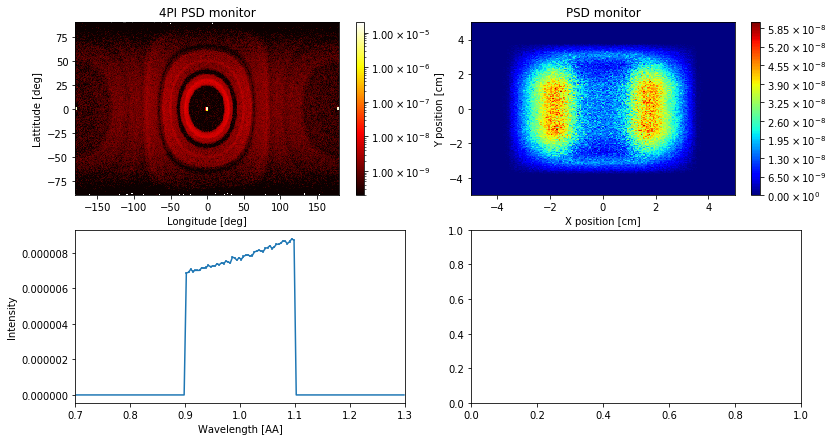

In [25]:
functions.name_plot_options("PSD_4PI", data, log=1, colormap="hot", orders_of_mag=5) # Adjusting PSD_4PI plot
plot = plotter.make_sub_plot(data) # Making subplot of our monitors